# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [56]:
# load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [60]:
# Fuel Types being used in 2008 and 2018
df_08['fuel'].unique(), df_18['fuel'].unique()

# Get the count of unique car models that runs with alternative fuels
alt_08 = df_08.loc[(df_08['fuel'] == 'CNG') | (df_08['fuel'] == 'ethanol')].model.nunique()
alt_18 = df_18.query('fuel in ["Electricity", "Ethanol"]').model.nunique()

# count the total sample of fuel for each year
fuel_08 = df_08['fuel'].value_counts()
fuel_18 = df_18['fuel'].value_counts()

# total fuel counts
total_08 = fuel_08.sum()
total_18 = fuel_18.sum()

# get percentage of fuel share
fuel_percent_08 = (fuel_08/total_08) * 100
fuel_percent_18 = (fuel_18/total_18) * 100

print(f'By 2018 there are {alt_18} unique models that runs with alternative \nfuels compared to 2008 when there are only {alt_08} uniqe models.\n')
print('Fuel Share Percentage\n')
print('Year 2008')
print(round(fuel_percent_08,3).to_string())
print('\nYear 2018')
print(round(fuel_percent_18,3).to_string())

By 2018 there are 26 unique models that runs with alternative 
fuels compared to 2008 when there are only 2 uniqe models.

Fuel Share Percentage

Year 2008
Gasoline    99.696
gas          0.101
ethanol      0.101
CNG          0.101

Year 2018
Gasoline       90.024
Ethanol         3.125
Gas             3.125
Diesel          2.284
Electricity     1.442


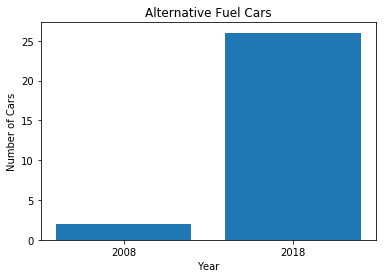

In [61]:
# Bar Plot
plt.bar(['2008','2018'],[alt_08,alt_18])
plt.title('Alternative Fuel Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars');

### Q2: How much have vehicle classes improved in fuel economy?  

In [62]:
# Get relevant dataframe

# Return a dataframe containing vehicle class and cmb_mpg for both 08 and 18
vcmb_mpg_08 = df_08.iloc[: ,np.r_[6,10]] # return all rows and colNum[6,10]
vcmb_mpg_18 = df_18.iloc[: ,np.r_[6,10]] # return all rows and colNum[6,10]

# Get the mean cmb_mpg of each vehicle type grouped by vehicle class
# then add year column
vcmb_mpg_08 = vcmb_mpg_08.groupby('veh_class').mean().round(3)
vcmb_mpg_08['year'] = '2008'
vcmb_mpg_18 = vcmb_mpg_18.groupby('veh_class').mean().round(3)
vcmb_mpg_18['year'] = '2018'

# Combine the two dataframes by column(axis=1) 
# where the dataframes intersects(join='inner')
combined_08_18 = pd.concat([vcmb_mpg_18,vcmb_mpg_08],axis=1,join='inner')

# Create a derived column in the combined dataframe
combined_08_18['improvement'] = vcmb_mpg_18['cmb_mpg'] - vcmb_mpg_08['cmb_mpg']
combined_08_18

,cmb_mpg,year,cmb_mpg,year,improvement
veh_class,,,,,
large car,23.409,2018,18.509,2008,4.900
midsize car,27.884,2018,21.601,2008,6.283
minivan,20.800,2018,19.118,2008,1.682
pickup,18.590,2018,16.277,2008,2.313
small car,25.421,2018,21.105,2008,4.316
station wagon,27.529,2018,22.367,2008,5.162


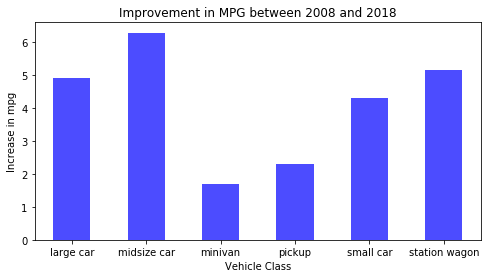

In [63]:
# Just plot the improvement column
ax = combined_08_18['improvement'].plot.bar(color='blue', alpha=.7, rot=0, figsize=(8,4))
# Add chart titles and labels
ax.set(xlabel="Vehicle Class", ylabel="Increase in mpg",
       title='Improvement in MPG between 2008 and 2018');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [64]:
# Get dataframes of smartway cars
smwy_08 = df_08[df_08['smartway'] == 'yes']
smwy_18 = df_18[df_18['smartway'] != 'No']

In [65]:
smwy_08.describe().round(3)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000,380.000,380.000,380.000,380.000,380.000,380.000
mean,2.603,4.826,7.366,20.984,28.413,23.737,6.868
std,0.623,1.002,1.148,3.443,3.075,3.060,0.827
min,1.300,4.000,6.000,17.000,22.000,20.000,6.000
25%,2.275,4.000,7.000,19.000,26.000,22.000,6.000
50%,2.400,4.000,7.000,20.000,28.000,23.000,7.000
75%,3.000,6.000,7.000,22.000,30.000,25.000,7.000
max,5.000,8.000,9.500,48.000,45.000,46.000,10.000


In [67]:
# Compare 2008 to 2018 smartway vehicles
smwy_18.describe().round(3) - smwy_08.describe().round(3)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,-272.000,-272.000,-272.000,-272.000,-272.000,-272.000,-272.000
mean,-0.815,-0.891,-2.153,13.923,13.059,13.624,1.058
std,-0.215,-0.586,0.650,12.989,10.020,11.788,0.370
min,-0.100,-1.000,-3.000,8.000,5.000,6.000,1.000
25%,-0.775,0.000,-4.000,9.000,10.000,9.000,1.000
50%,-0.700,0.000,-1.500,8.500,9.000,9.000,0.000
75%,-1.000,-2.000,0.000,9.250,10.250,10.000,2.000
max,-1.500,-2.000,-2.500,65.000,54.000,60.000,0.000


* From **2008** to **2018** we've seen **13.62 mpg improvement** in fuel economy, average **air pollution score** is **lower** by **2.15**, in average half of all smartway vehicles had **lower** air pollution score of **1.5**. 

### Q4: What features are associated with better fuel economy?

In [75]:
# Return a dataframe where cmb_mpg is GREATER than average for all vehicles
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe().round(3)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000,519.000,519.000,519.000,519.000,519.000,519.000
mean,2.668,4.890,6.998,20.318,27.603,22.992,6.640
std,0.666,1.035,1.160,3.198,3.051,2.926,0.805
min,1.300,4.000,4.000,17.000,20.000,20.000,6.000
25%,2.300,4.000,6.000,18.000,25.000,21.000,6.000
50%,2.500,4.000,7.000,20.000,27.000,22.000,6.000
75%,3.000,6.000,7.000,21.000,29.000,24.000,7.000
max,6.000,8.000,9.500,48.000,45.000,46.000,10.000


In [76]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe().round(3)

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000,328.000,328.000,328.000,328.000,328.000,328.000
mean,1.964,4.021,4.857,27.473,35.305,30.412,6.329
std,0.399,0.465,1.861,11.034,9.025,10.082,1.410
min,1.200,3.000,1.000,21.000,27.000,25.000,4.000
25%,1.600,4.000,3.000,23.000,31.000,26.000,5.000
50%,2.000,4.000,5.000,25.000,33.000,28.000,6.000
75%,2.000,4.000,7.000,28.000,36.000,31.000,7.000
max,3.500,6.000,7.000,113.000,99.000,106.000,10.000
